<a href="https://colab.research.google.com/github/yooburi/ML_DL_yooburi/blob/main/midterm_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

## Linear Regression

목적: DATA를 가장 잘 설명하는 선형모델(함수) 찾기

선형함수가 데이터를 잘 추종하는지 평가하기 위해 Loss를 설정하고 이를 최소화하는 방향으로 '가중치'를 업데이트 함. Loss는 실제 값 y와 예측한 값의 차이.

MSE Loss는 Mean Square Error로 (GT - Pred)를 제곱한 뒤 평균 낸 값.


* Loss와 Gradient
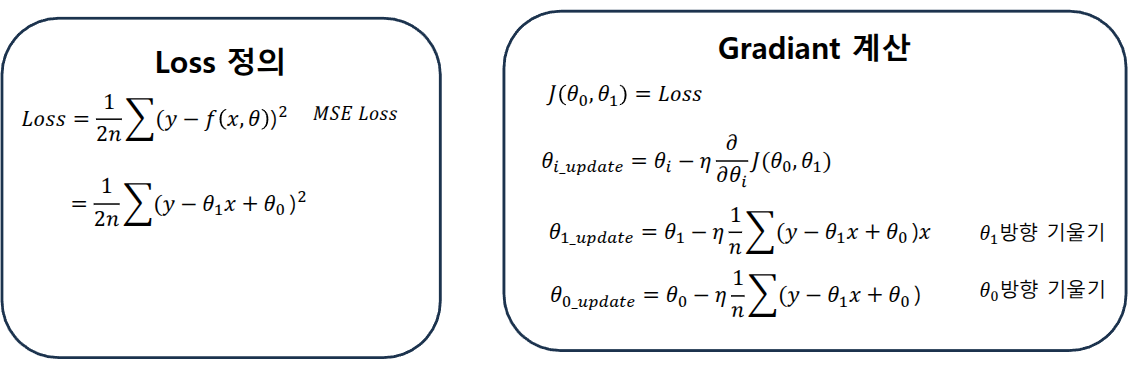

각 가중치 업데이트할 때 미분값은 가중치 인덱스에 따라 다르다.(편미분!)

torch.Size([10])
torch.Size([10])


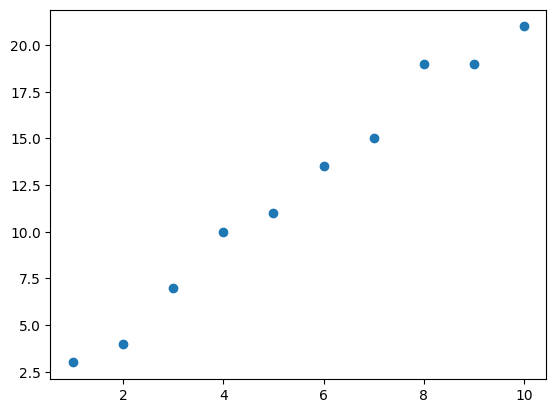

In [1]:
import torch
import matplotlib.pyplot as plt

# 1. 학습 데이터 예시
# 1차원 tensor: 벡터
x = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=torch.float32)
y = torch.tensor([3, 4, 7, 10, 11, 13.5, 15, 19, 19, 21], dtype=torch.float32)
print(x.shape)
print(y.shape)
plt.scatter(x,y)


In [2]:
#가중치와 bias 정의
w = torch.tensor([5.0])
b = torch.tensor([1.0])

#학습률 설정
lr = 0.001

#에포크 정의
epochs = 100

print(w.shape)
print(b.shape)

torch.Size([1])
torch.Size([1])


In [3]:
#학습
loss_history = []

for epoch in range(epochs):
  #예측값
  y_pred = w * x + b

  #손실 함수: MSE
  #.mean()는 평균을 계산하는 함수
  loss = ((y_pred - y)**2).mean()

  #gradient
  dw = (2 * (y_pred - y) * x).mean()
  db = (2 * (y_pred - y)).mean()

  #update (누적 연산: 업데이트 개념)
  # w = w - lr*grad
  w -= lr * dw
  b -= lr * db

  #기록
  loss_history.append(loss.item())
  if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:3d} | Loss: {loss.item():.4f} | w: {w.item():.4f}, b: {b.item():.4f}")

Epoch   1 | Loss: 334.5250 | w: 4.7732, b: 0.9675
Epoch   5 | Loss: 174.0588 | w: 4.0307, b: 0.8612
Epoch  10 | Loss: 77.0669 | w: 3.3870, b: 0.7691
Epoch  15 | Loss: 34.2799 | w: 2.9594, b: 0.7080
Epoch  20 | Loss: 15.4048 | w: 2.6753, b: 0.6676
Epoch  25 | Loss: 7.0783 | w: 2.4867, b: 0.6409
Epoch  30 | Loss: 3.4051 | w: 2.3613, b: 0.6233
Epoch  35 | Loss: 1.7847 | w: 2.2781, b: 0.6117
Epoch  40 | Loss: 1.0698 | w: 2.2228, b: 0.6042
Epoch  45 | Loss: 0.7545 | w: 2.1860, b: 0.5993
Epoch  50 | Loss: 0.6153 | w: 2.1616, b: 0.5961
Epoch  55 | Loss: 0.5540 | w: 2.1453, b: 0.5942
Epoch  60 | Loss: 0.5269 | w: 2.1345, b: 0.5930
Epoch  65 | Loss: 0.5149 | w: 2.1273, b: 0.5924
Epoch  70 | Loss: 0.5096 | w: 2.1225, b: 0.5920
Epoch  75 | Loss: 0.5072 | w: 2.1193, b: 0.5920
Epoch  80 | Loss: 0.5062 | w: 2.1172, b: 0.5920
Epoch  85 | Loss: 0.5057 | w: 2.1157, b: 0.5922
Epoch  90 | Loss: 0.5055 | w: 2.1148, b: 0.5924
Epoch  95 | Loss: 0.5054 | w: 2.1141, b: 0.5927
Epoch 100 | Loss: 0.5053 | w: 2.1

학습을 통해 결정된 가중치들은 약 w = 2.1 & b = 0.59이다.

**에포크를 돌며 가중치를 계속 업데이트하고 업데이트하며 오차가 줄어들도록 하는 것이다.** -> 에포크는 데이터 전체를 사용해 모델을 학습시키는 과정.

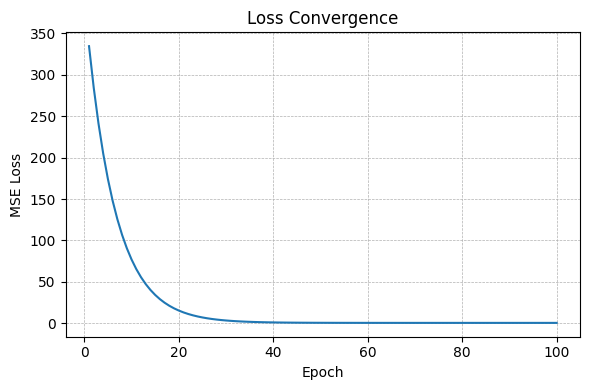

In [4]:
# 손실 함수 plot
plt.figure(figsize=(6,4))
plt.plot(range(1, epochs+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss Convergence")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

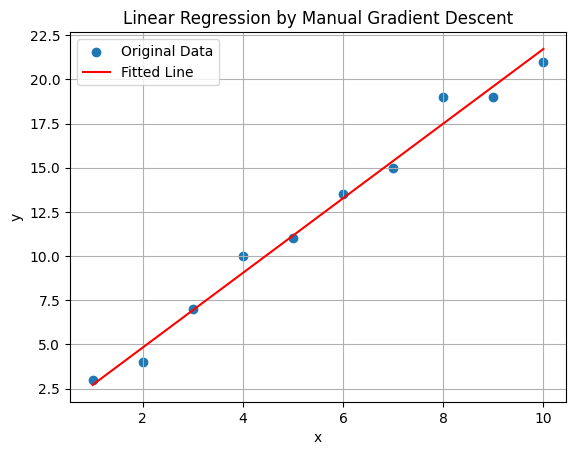

In [5]:
# 결과 시각화
with torch.no_grad():
    y_final = w * x + b
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, y_final, color='red', label='Fitted Line')
    plt.legend()
    plt.title('Linear Regression by Manual Gradient Descent')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

Learning rate를 극단적으로 낮게, 혹은 크게 잡은 경우 학습이 느리게 진행되거나 수렴하지 못하고 발산할 수 있다. 따라서 적절한 step의 크기를 고려해주어야 한다.

### pytorch 내장 함수를 이용한 gradient descent

Epoch   1 | Loss: 249.6444 | w: 1.6934, b: -0.2792
Epoch  20 | Loss: 0.6718 | w: 2.2164, b: -0.1280
Epoch  40 | Loss: 0.6450 | w: 2.2060, b: -0.0558
Epoch  60 | Loss: 0.6223 | w: 2.1965, b: 0.0106
Epoch  80 | Loss: 0.6032 | w: 2.1877, b: 0.0716
Epoch 100 | Loss: 0.5870 | w: 2.1797, b: 0.1277


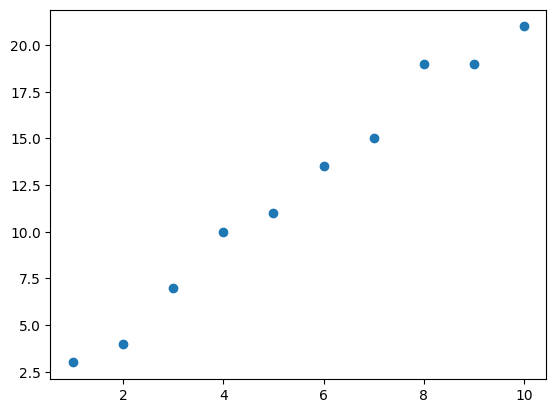

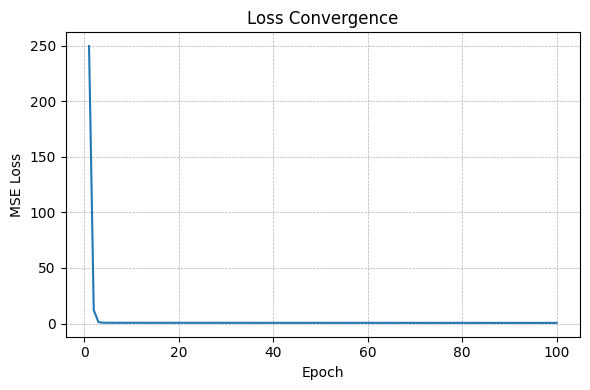

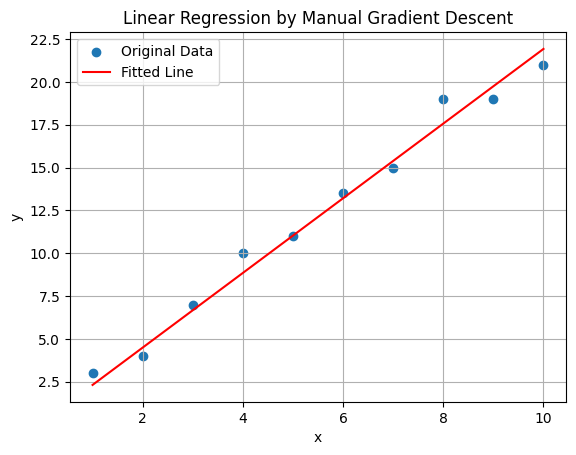

In [6]:
import torch
import matplotlib.pyplot as plt

# 학습 데이터 예시
x = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=torch.float32)
y = torch.tensor([3, 4, 7, 10, 11, 13.5, 15, 19, 19, 21], dtype=torch.float32)
plt.scatter(x,y)


# 가중치와 편향 정의
# w와 b는 정규분포 N(0,1)에서 랜덤으로 난수 골라서 초기화한 파라미터
# requires_grad=True라서 역전파로 기울기가 계산돼 업데이트될 수 있음.
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# 학습률 설정
lr = 0.01

# 에포크
epochs = 100

loss_history = []
for epoch in range(epochs):
    # 1) 순전파
    y_pred = w * x + b

    #MSE error
    loss = (((y_pred - y) ** 2).mean())

    # 2) 역전파 -> 자동 미분 dw와 db
    loss.backward()

    # 3) 파라미터 갱신
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # 4) grad 초기화(누적 방지) -> pytorch에서 계산된 gradient는 누적됨. 이전 epoch의 gradient 영향 방지하는 것과 같다.
    w.grad.zero_()
    b.grad.zero_()

    # 기록 & 출력
    loss_history.append(loss.item())
    if (epoch + 1) % 20 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:3d} | Loss: {loss.item():.4f} | w: {w.item():.4f}, b: {b.item():.4f}")

# 손실 수렴 플롯
plt.figure(figsize=(6,4))
plt.plot(range(1, epochs+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss Convergence")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# 결과 시각화
with torch.no_grad():
    y_final = w * x + b
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, y_final, color='red', label='Fitted Line')
    plt.legend()
    plt.title('Linear Regression by Manual Gradient Descent')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

### pytorch 내장 함수를 이용한 Loss Function

criterion이란 모델의 출력값과 정답의 차이를 계산해주는 손실 함수를 말한다.(기준이라는 뜻)

딥러닝 코드에서 criterion은 보통 다음과 같이 쓰인다.

```
#회귀 숫자 예측
criterion = torch.nn.MSELoss()
loss = criterion(pred, y)

loss.backward() #손실값 기준으로 기울기 계산


# 다중 분류
criterion = torch.nn.CrossEntropyLoss()
loss = criterion(pred, y)

loss.backward() #손실값 기준으로 기울기 계산
```



### 실습 과제

## ANN Regression

Artificial Neural Network, ANN은 여러개의 뉴런을 연결하는 것으로 구성된다.

입력층, 은닉층, 출력층으로 나눌 수 있고 뉴런 각각의 출력이 다른 퍼셉트론의 입력값으로 연쇄적으로 전달된다.

### ANN&DNN의 동작과정

1. 순전파: 입력->가중합->활성화함수->출력

2. 손실: 순전파에서 계산된 출력과 실제 Ground Truth 차이를 계산. 대표적으로 MAE와 MSE를 사용한다.

3. 역전파: 손실함수에서 계산된 차이를 역으로 입력층으로 전달해가면서 각 가중치에 대한 오차의 기울기를 계산하고 이전층으로 전달.(chain rule, 편미분)

4. 최적화: Loss가 최소가 되도록 각 뉴런의 가중치와 편향을 업데이트

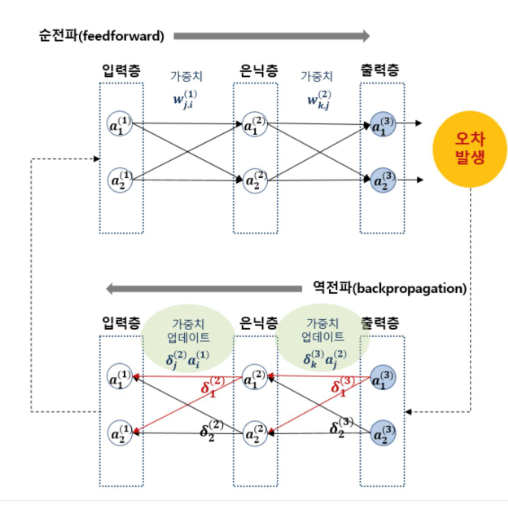

### ANN practice **중요**

* Overfitting Problem 과적합 문제

training data에서 loss를 최소화하는 것이 좋다고 했다. 하지만 무작정 **최소화하는 것이 최선이 아닐 수 있다.** 학습데이터에 너무 맞추어져 범용성이 떨어질 수 있기 때문.

```
임의의 좌표 데이터를 근사하는 regression 모델 도출

pytorch를 이용한 ANN 모델의 기본 구조 구축

은닉층을 추가하여 ANN vs DNN 비교

과적합 방지를 위한 알고리즘 적용
```

In [7]:
import numpy as np
import torch
import torch.nn as nn #pytorch의 신경망 관련 함수, 레이어,손실함수,모델정의 등
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

In [8]:
# ----------------------------
#난수 고정 -> 학습 결과가 동일하게 도출되도록
# ----------------------------
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# ----------------------------
#데이터 생성 -> 60개의 (x,y)좌표 데이터를 생성하고 80%는 학습(train) 20%는 검증(valid)
# ----------------------------
N = 60
x = np.random.uniform(-1.5, 1.5, (N, 1)) # -1.5 ~ 1.5로 랜덤하게 생성
y_true = np.sin(2 * np.pi * x) + 0.3 * x
y = y_true + 0.3 * np.random.randn(N, 1) # sin 주변으로 랜덤하게 y 생성

# 시각화용 데이터
x_plot = np.linspace(-1.8, 1.8, 400).reshape(-1, 1)
y_plot_true = np.sin(2 * np.pi * x_plot) + 0.3 * x_plot

# train/val 분리 -> 랜덤하게 섞어서 앞에 80% cut내서 train val로.
idx = np.arange(N); np.random.shuffle(idx)
cut = int(0.8 * N)
x_tr, y_tr = x[idx[:cut]], y[idx[:cut]]
x_va, y_va = x[idx[cut:]], y[idx[cut:]]


# Tensor 변환
x_tr_t = torch.tensor(x_tr, dtype=torch.float32)
y_tr_t = torch.tensor(y_tr, dtype=torch.float32)
x_va_t = torch.tensor(x_va, dtype=torch.float32)
y_va_t = torch.tensor(y_va, dtype=torch.float32)
x_plot_t = torch.tensor(x_plot, dtype=torch.float32)

#batch 설정
#배치사이즈 32로 잡아 나누어 학습. 에포크마다 샘플 순서 섞어서 일반화에 도움
train_loader = DataLoader(TensorDataset(x_tr_t, y_tr_t), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(x_va_t, y_va_t), batch_size=len(x_va), shuffle=False)

**ANN 모델 설정**

1-64-1 구조 ANN

활성화 함수: ReLU 사용

learning rate: 0.001

Loss: MSE

Adaptive Moment Estimation optimizer 사용

In [9]:
# ----------------------------
# 3) 모델
# ----------------------------
model = nn.Sequential(
    nn.Linear(1, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

#Loss Function과 Optimizer.
#Optimizer은 실제로 gradient descent를 진행하는 부분.
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [10]:
EPOCHS = 1500
train_hist, val_hist = [], []

#가중치와 편향을 직접 정의하지 않고 pytorch 내부에서 자동으로 업데이트되어 저장
for epoch in range(1, EPOCHS+1):
    # train
    model.train() #모델-학습모드 설정
    batch_losses = []
    for xb, yb in train_loader:
        pred = model(xb) # xb input에 대한 모델의 예측 결과
        loss = criterion(pred, yb) #MSE Loss
        optimizer.zero_grad() # 가중치별 gradient 초기화
        loss.backward() # 역으로 돌며 각 layer weight 기울기 계산(chain rules & 편미분)
        optimizer.step() # 정의한 optimizer 알고리즘에 따라 뉴런 파라미터 업데이트
        batch_losses.append(loss.item())
    train_loss = np.mean(batch_losses)

    # val
    model.eval()
    with torch.no_grad():
        for xv, yv in val_loader:
            val_loss = criterion(model(xv), yv).item()

    train_hist.append(train_loss)
    val_hist.append(val_loss)

    if epoch % 300 == 0:
        print(f"Epoch {epoch} | Train {train_loss:.4f} | Val {val_loss:.4f}")

Epoch 300 | Train 0.0919 | Val 0.1614
Epoch 600 | Train 0.0630 | Val 0.1535
Epoch 900 | Train 0.0437 | Val 0.1411
Epoch 1200 | Train 0.0410 | Val 0.1427
Epoch 1500 | Train 0.0492 | Val 0.1490


* 학습 코드 설명
```
1. pred = model(xb) #xb input에 대한 모델의 예측 결과
```
model(xb)는 모델의 순전파의 결과. 앞서 정의한 model 구조(1-64-1)에 따라 입력을 통과 시키고 나온 결과.


> 그래서 선형 회귀랑 뭐가 다른데??
```
선형 회귀는 전체 경향을 한 번에 찾는 방식. 모델의 형태는 직선으로 고정되어 있고 w,b만 학습

딥러닝(ANN, DNN)은 '비선형 함수'로 근사!
-> 여러 층과 비선형 활성함수를 거치면서 단순한 직선이 아니라 복잡한 곡면으로 데이터를 근사. 직선 추세보다는 데이터 전체를 학습하여 비선형적인 경향을 모사해낸다.
```
**데이터의 실제 모양을 근사하는 함수 자체를 배우는 것**

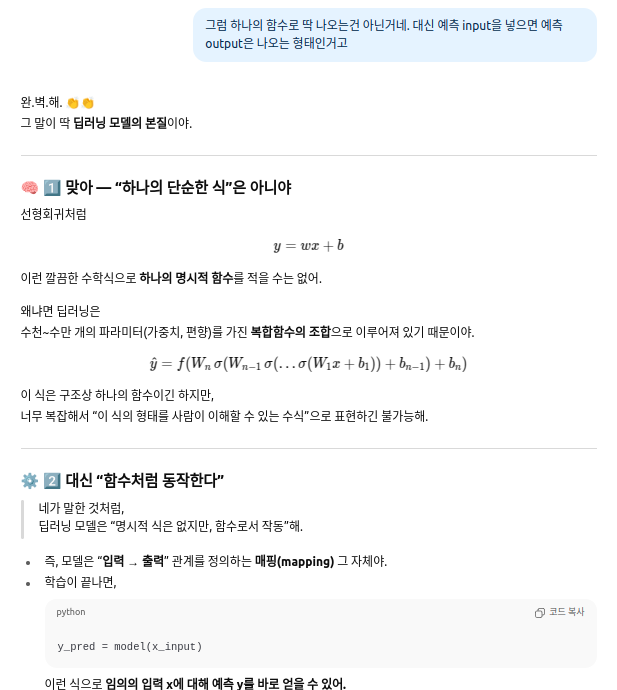

```
2. optimizer.step()
```
loss.backward()를 통해 거슬러 올라가면서 w.grad를 chain rule로 계산

옵티마이저 종류의 규칙으로 ``` 파라미터 ← 파라미터 − (학습률 × 가공된 gradient)``` 적용

다음 스텝을 위해 grad 누적을 초기화 ``` optimizer.zero_grad() ```


---
---

* 검증 코드 설명

```
    model.eval()
    with torch.no_grad():
        for xv, yv in val_loader:
            val_loss = criterion(model(xv), yv).item()

    train_hist.append(train_loss)
    val_hist.append(val_loss)

    if epoch % 300 == 0:
        print(f"Epoch {epoch} | Train {train_loss:.4f} | Val {val_loss:.4f}")
```
모델 - 검증 모드 설정.

**완성된 ANN 모델**에 검증 데이터를 적용하여 Loss를 계산

**학습 Loss가 낮으나 검증 Loss가 높은 경우, 학습에 너무 치중되어 있는 overfit 문제 발생할 수 있음.**


Validation RMSE: 0.3860


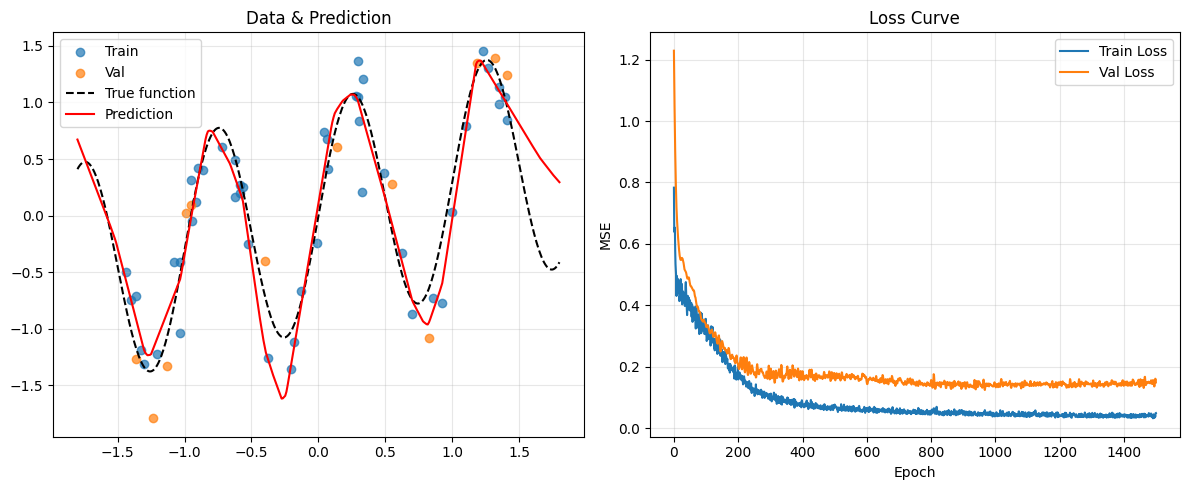

In [11]:
#시각화

model.eval()
with torch.no_grad():
    y_pred_curve = model(x_plot_t).numpy()
    y_pred_val = model(x_va_t).numpy()

rmse_val = np.sqrt(np.mean((y_pred_val - y_va) ** 2))
print(f"Validation RMSE: {rmse_val:.4f}")

plt.figure(figsize=(12,5))


# (A) 데이터 & 예측
plt.subplot(1,2,1)
plt.title("Data & Prediction")
plt.scatter(x_tr, y_tr, label="Train", alpha=0.7)
plt.scatter(x_va, y_va, label="Val", alpha=0.7)
plt.plot(x_plot, y_plot_true, "k--", label="True function")
plt.plot(x_plot, y_pred_curve, "r", label="Prediction")

plt.legend(); plt.grid(alpha=0.3)

# (B) 손실 곡선
plt.subplot(1,2,2)
plt.title("Loss Curve")
plt.plot(train_hist, label="Train Loss")
plt.plot(val_hist, label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### ANN 회귀 모델 평가

현재 검증 손실이 학습 손실에 비해 크게 계산되었다. = 과적합되어 있다. 학습 데이터에 치중되어 있다.

개선해보자..

```
1. 은닉층 내부 뉴런을 64개에서 128개로 증가

2. 은닉층 레이어를 2개로 증가

3. 활성화 함수 (sigmoid, tanh, softmax, ReLU) 변경

4. 은닉층을 다수 쌓아 DNN 모델로 변경하는 경우.
-> 지나치게 많은 레이어로 과적합이 발생하고 학습이 제대로 이루어지지 않는 상태가 될 수 있다. 즉, 은닉층이 많다고 학습이 잘되는 건 아니다.
```

이렇게 우리가 직접 지정하여 영향을 미칠 수 있는 파라미터를 **하이퍼 파라미터**라고 한다.

\\


* **하이퍼 파라미터 예시**
```
- 은닉층 개수
- 은닉층 뉴런 수
- 활성화 함수
- Optimizer
- 학습률
- 에포크
- 배치
```

### 은닉층 개수에 따른 결과 비교

레이어가 증가할수록 train loss는 감소하나, validation loss는 증가한다. -> 과적합 발생

[Depth=0] Train MSE=0.5644 | Val MSE=0.5467
[Depth=1] Train MSE=0.1601 | Val MSE=0.2271
[Depth=2] Train MSE=0.0378 | Val MSE=0.1277
[Depth=4] Train MSE=0.0200 | Val MSE=0.1521
[Depth=8] Train MSE=0.0161 | Val MSE=0.1450


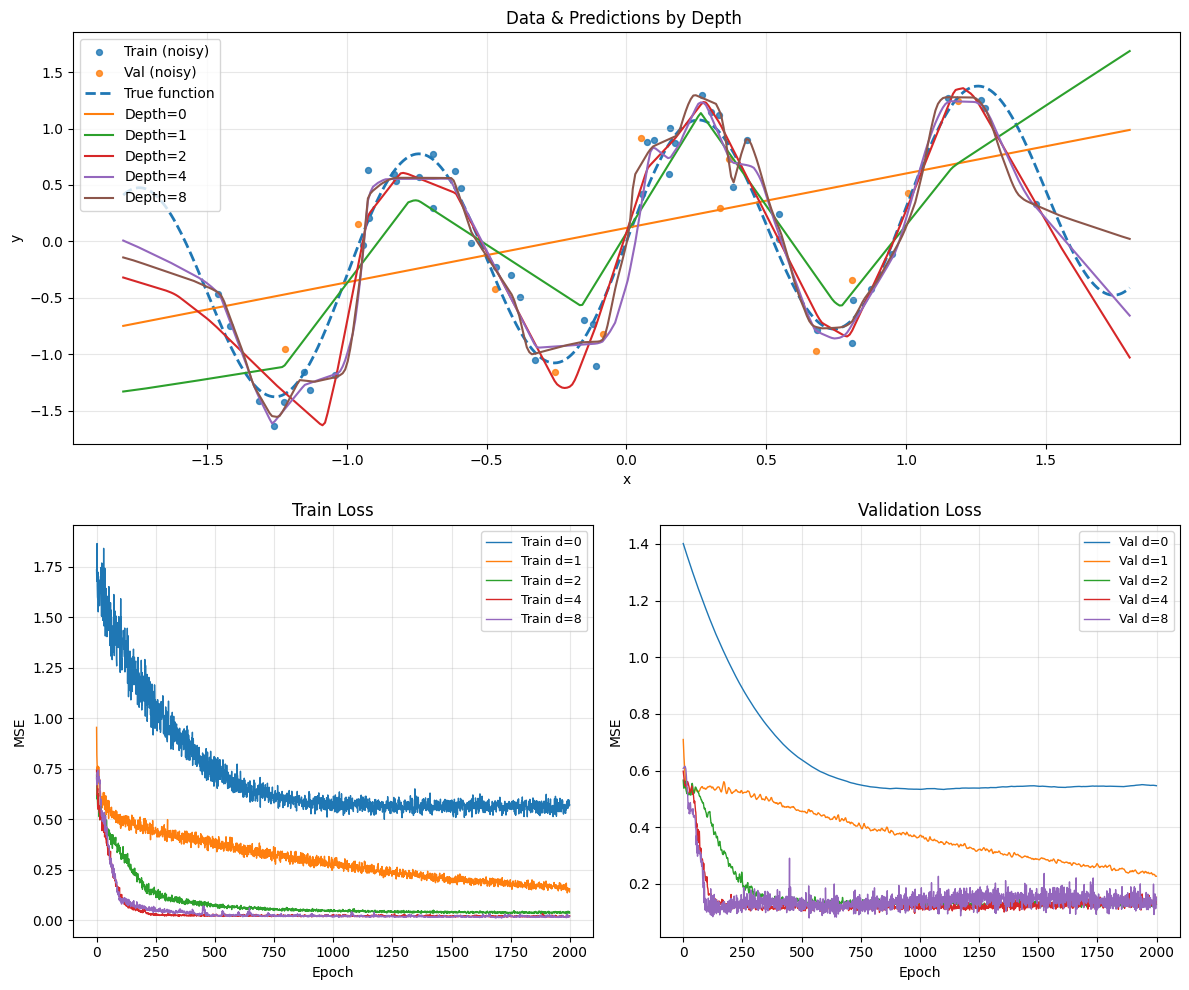


=== Final MSE Summary ===
Depth= 0 | Train MSE=0.5644 | Val MSE=0.5467
Depth= 1 | Train MSE=0.1601 | Val MSE=0.2271
Depth= 2 | Train MSE=0.0378 | Val MSE=0.1277
Depth= 4 | Train MSE=0.0200 | Val MSE=0.1521
Depth= 8 | Train MSE=0.0161 | Val MSE=0.1450


In [12]:

import math
import random
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt

# 1) 재현성 고정
SEED = 777
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2) 데이터 생성 (작은 표본 + 노이즈 → 과적합 유도)
#    진짜 함수: y = sin(2πx) + 0.3x  (비선형 + 약간의 선형성)
#    학습 데이터는 적게, 검증/테스트는 조밀하게
N = 60                  # 학습용 표본 수 (적게!)
x_train = np.random.uniform(-1.5, 1.5, size=(N, 1))
true_y = np.sin(2 * np.pi * x_train) + 0.3 * x_train
noise = 0.3 * np.random.randn(N, 1)   # 비교적 큰 노이즈
y_train = true_y + noise

# 검증 셋 분할 (train:val = 80:20)
idx = np.arange(N)
np.random.shuffle(idx)
cut = int(0.8 * N)
tr_idx, val_idx = idx[:cut], idx[cut:]
x_tr, y_tr = x_train[tr_idx], y_train[tr_idx]
x_val, y_val = x_train[val_idx], y_train[val_idx]

# 테스트/시각화용 촘촘한 x
x_plot = np.linspace(-1.8, 1.8, 400).reshape(-1, 1)
y_plot_true = np.sin(2 * np.pi * x_plot) + 0.3 * x_plot

# Tensor 변환
x_tr_t = torch.tensor(x_tr, dtype=torch.float32)
y_tr_t = torch.tensor(y_tr, dtype=torch.float32)
x_val_t = torch.tensor(x_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)
x_plot_t = torch.tensor(x_plot, dtype=torch.float32)

train_ds = TensorDataset(x_tr_t, y_tr_t)
val_ds   = TensorDataset(x_val_t, y_val_t)

# 3) MLP 모델 팩토리
class MLP(nn.Module):
    def __init__(self, in_dim=1, hidden_dim=64, out_dim=1, num_hidden_layers=2):
        """
        num_hidden_layers = 은닉층 개수 (예: 0이면 선형 회귀, 1이면 1개 은닉층)
        """
        super().__init__()
        layers = []
        last = in_dim
        for _ in range(num_hidden_layers):
            layers += [nn.Linear(last, hidden_dim), nn.ReLU()]
            last = hidden_dim
        layers += [nn.Linear(last, out_dim)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# 4) 학습 루프
def train_model(depth, epochs=2000, lr=1e-3, batch_size=32, weight_decay=0.0):
    """
    depth: 은닉층 개수
    weight_decay: L2 정규화(기본 0으로 두어 과적합 관찰을 쉽게)
    """
    model = MLP(in_dim=1, hidden_dim=64, out_dim=1, num_hidden_layers=depth).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.MSELoss()

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_ds, batch_size=len(val_ds), shuffle=False)

    tr_hist, val_hist = [], []
    for ep in range(1, epochs+1):
        # train
        model.train()
        ep_tr_losses = []
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = loss_fn(pred, yb)
            opt.zero_grad()
            loss.backward()
            opt.step()
            ep_tr_losses.append(loss.item())

        tr_loss = float(np.mean(ep_tr_losses))

        # val
        model.eval()
        with torch.no_grad():
            for xv, yv in val_loader:
                xv, yv = xv.to(device), yv.to(device)
                pv = model(xv)
                val_loss = loss_fn(pv, yv).item()

        tr_hist.append(tr_loss)
        val_hist.append(val_loss)

    # 최종 예측 곡선
    model.eval()
    with torch.no_grad():
        y_plot_pred = model(x_plot_t.to(device)).cpu().numpy()

    # 최종 MSE
    with torch.no_grad():
        tr_mse = nn.MSELoss()(model(x_tr_t.to(device)), y_tr_t.to(device)).item()
        val_mse = nn.MSELoss()(model(x_val_t.to(device)), y_val_t.to(device)).item()

    return model, np.array(tr_hist), np.array(val_hist), y_plot_pred, tr_mse, val_mse

# 5) 서로 다른 깊이 비교
depth_list = [0, 1, 2, 4, 8]  # 0=선형, 1=은닉 1개, ... (깊어질수록 파라미터 ↑)
results = {}

for d in depth_list:
    model, tr_hist, val_hist, y_pred_curve, tr_mse, val_mse = train_model(
        depth=d, epochs=2000, lr=1e-3, batch_size=32, weight_decay=0.0
    )
    results[d] = {
        "tr_hist": tr_hist,
        "val_hist": val_hist,
        "pred_curve": y_pred_curve,
        "tr_mse": tr_mse,
        "val_mse": val_mse
    }
    print(f"[Depth={d}] Train MSE={tr_mse:.4f} | Val MSE={val_mse:.4f}")

# 6) 시각화
plt.figure(figsize=(12, 10))

# (A) 데이터 + 각 모델 예측 곡선
plt.subplot(2,1,1)
plt.title("Data & Predictions by Depth ")
plt.scatter(x_tr, y_tr, s=18, label="Train (noisy)", alpha=0.8)
plt.scatter(x_val, y_val, s=18, label="Val (noisy)", alpha=0.8)
plt.plot(x_plot, y_plot_true, linewidth=2, label="True function", linestyle="--")

for d in depth_list:
    plt.plot(x_plot, results[d]["pred_curve"], label=f"Depth={d}", linewidth=1.5)

plt.xlabel("x"); plt.ylabel("y")
plt.legend(loc="best")
plt.grid(alpha=0.3)

# (B) 각 depth의 학습/검증 손실 곡선
plt.subplot(2,2,3)
for d in depth_list:
    plt.plot(results[d]["tr_hist"], label=f"Train d={d}", linewidth=1)
plt.title("Train Loss")
plt.xlabel("Epoch"); plt.ylabel("MSE"); plt.grid(alpha=0.3)
plt.legend(fontsize=9)

plt.subplot(2,2,4)
for d in depth_list:
    plt.plot(results[d]["val_hist"], label=f"Val d={d}", linewidth=1)
plt.title("Validation Loss")
plt.xlabel("Epoch"); plt.ylabel("MSE"); plt.grid(alpha=0.3)
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()

# 7) 최종 요약 출력
print("\n=== Final MSE Summary ===")
for d in depth_list:
    print(f"Depth={d:>2} | Train MSE={results[d]['tr_mse']:.4f} | Val MSE={results[d]['val_mse']:.4f}")


### 실습 과제